<a href="https://colab.research.google.com/github/ChitrarthVasdev/CODSOFT/blob/main/movieratingpredicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 2: MOVIE RATING PREDICTION

MADE BY : CHITRARTH VASDEV

DOMAIN : DATA SCIENCE

LANGUAGE : PYTHON

MODEL : LINEAR REGRESSION


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')
display(df)



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows with missing values
df = df.dropna(subset=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating'])
display(df)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
# top 20 categories and labeled as 'Other'
def simplify_column(df, column, top_n=20):
    top_values = df[column].value_counts().nlargest(top_n).index
    return df[column].apply(lambda x: x if x in top_values else 'Other')

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = simplify_column(df, col)

# Features and target
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Linear Regression pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 1.29
R² Score: 0.10


In [ ]:
# Example prediction
sample = pd.DataFrame([{
    'Genre': 'Drama',
    'Director': 'Sanjay Leela Bhansali',
    'Actor 1': 'Shah Rukh Khan',
    'Actor 2': 'Aishwarya Rai',
    'Actor 3': 'Salman Khan'
}])

predicted_rating = model.predict(sample)
print(f"Predicted Rating: {predicted_rating[0]:.2f}")

Predicted Rating: 6.39


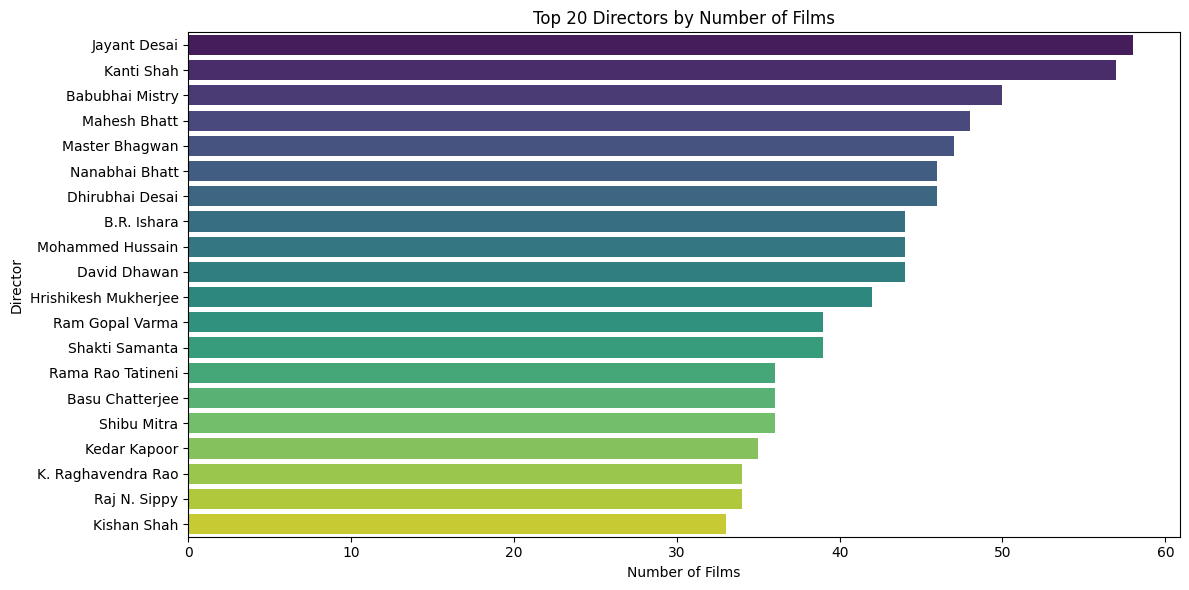

In [ ]:
# Plot the top 20 directors
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.head(20).values, y=director_counts.head(20).index, palette="viridis",
            hue=director_counts.head(20).index, legend=False) # Added hue and kept legend=False
plt.title("Top 20 Directors by Number of Films")
plt.xlabel("Number of Films")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

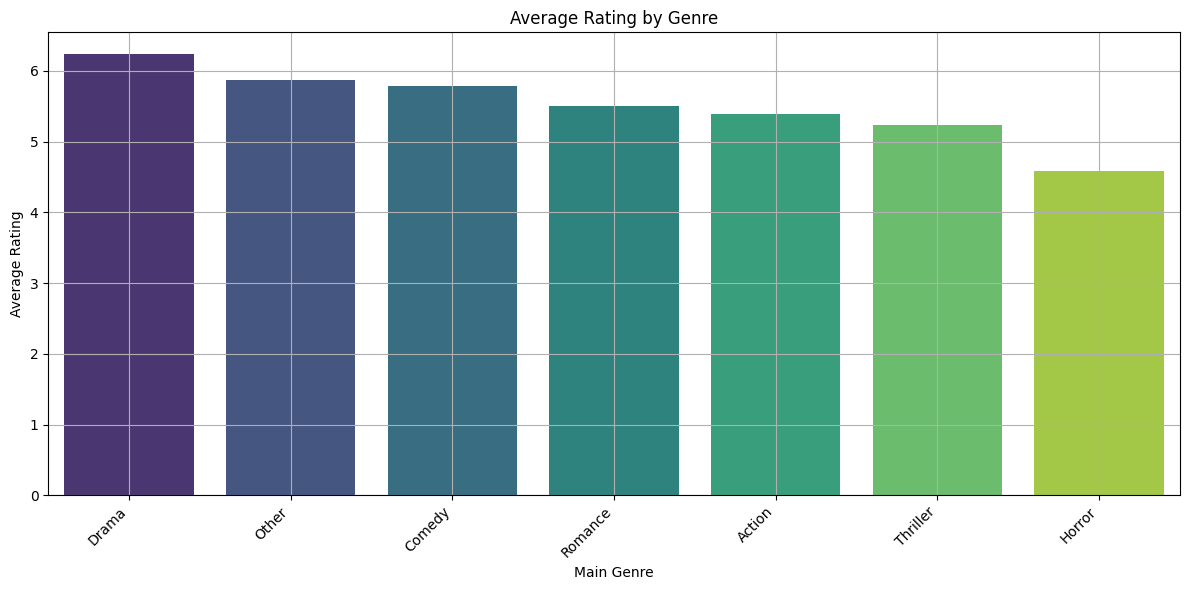

In [ ]:
plt.figure(figsize=(12, 6))
df['Main Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Calculate the average rating for each main genre
genre_avg = df.groupby('Main Genre')['Rating'].mean().sort_values(ascending=False)

# Create the bar plot using the calculated genre_avg
sns.barplot(x=genre_avg.index, y=genre_avg.values, palette='viridis', hue=genre_avg.index, legend=False)
plt.title('Average Rating by Genre')
plt.xlabel('Main Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

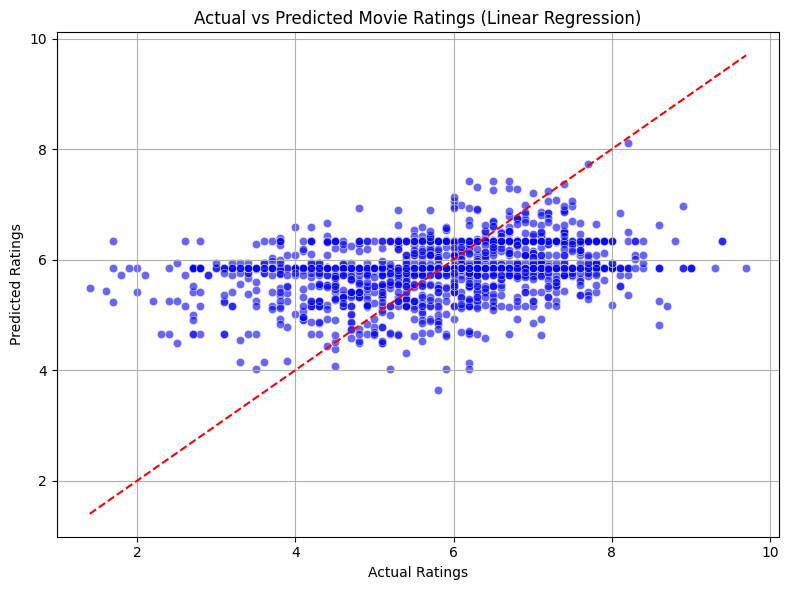

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


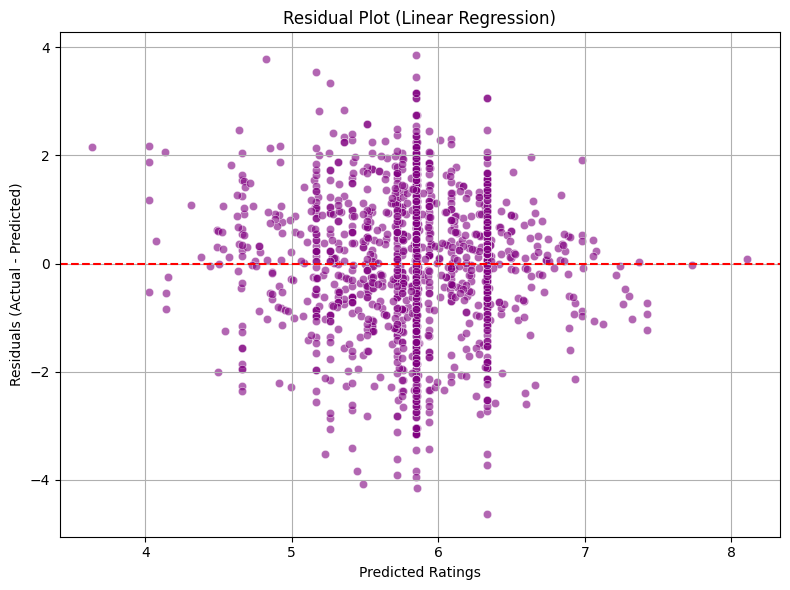

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero error
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


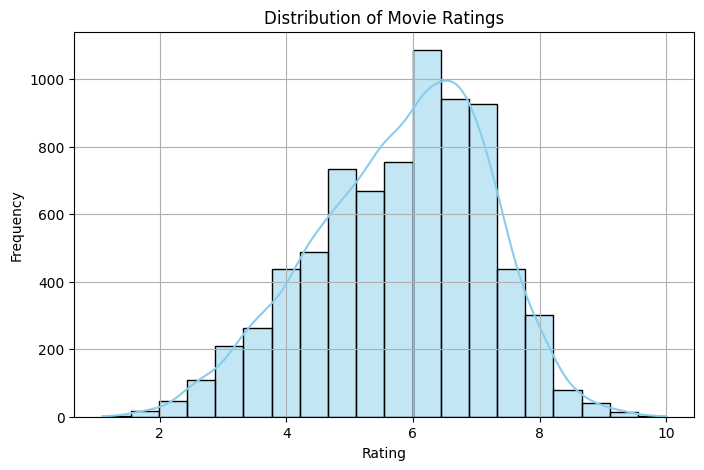

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


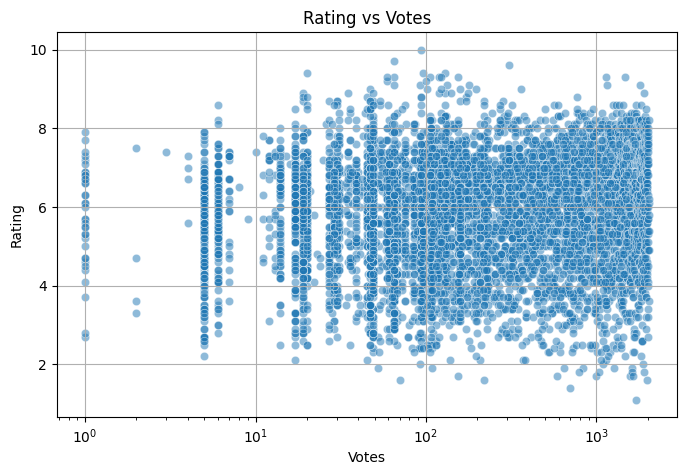

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Rating', data=df, alpha=0.5)
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log')  # votes are skewed
plt.grid(True)
plt.show()
